In [1]:
## Homework - Whale Analysis ##

In [64]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [191]:
# Reading, cleaning and combining data into a single frame #

## Borrowing code from previous projects module 3 ##

whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")

# Read in data
#whale_returns = pd.read_csv(whale_returns_path, parse_dates=True)
#algo_returns = pd.read_csv(algo_returns_path, parse_dates=True)
#sp500_history = pd.read_csv(sp500_history_path, parse_dates=True)

whale_returns = pd.read_csv(
    whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns = pd.read_csv(
    algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history = pd.read_csv(
    sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Check for nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()

# Drop na
whale_returns = whale_returns.dropna()
algo_returns = algo_returns.dropna()
sp500_history = sp500_history.dropna()

# Validate no more missing values
whale_returns.isnull().sum()
whale_returns.head()
algo_returns.isnull().sum()
algo_returns.head()
sp500_history.isnull().sum()
sp500_history.head()

# Set Date as index
#whale_returns = whale_returns.set_index('Date')
#algo_returns = algo_returns.set_index('Date')
#sp500_history = sp500_history.set_index('Date')

# Sort Date as Index
whale_returns = whale_returns.sort_index()
algo_returns = algo_returns.sort_index()
sp500_history = sp500_history.sort_index()

# Set Date Format
#sp500_history.index

#sp500_history.index = pd.to_datetime(sp500_history.index,format='%d-%b-%y')
#sp500_history = sp500_history.reset_index()
#sp500_history.index = sp500_history.index.dt.strftime('%Y-%m-%d')

/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_2544/3219306655.py:14: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(
/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_2544/3219306655.py:17: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv(
/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_2544/3219306655.py:20: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://p

In [192]:
# Convert string to float for clean numeric format

sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert S&P 500 closing prices to returns

sp500_returns = sp500_history.pct_change().dropna()


In [193]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [194]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [195]:



sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [196]:
# Join daily returns files together into a single data frame with columns for each portfolio's returns

# Create a new pivot table where the columns are the closing prices for each ticker

all_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
all_returns.sort_index(inplace=True)

# Display a few rows
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

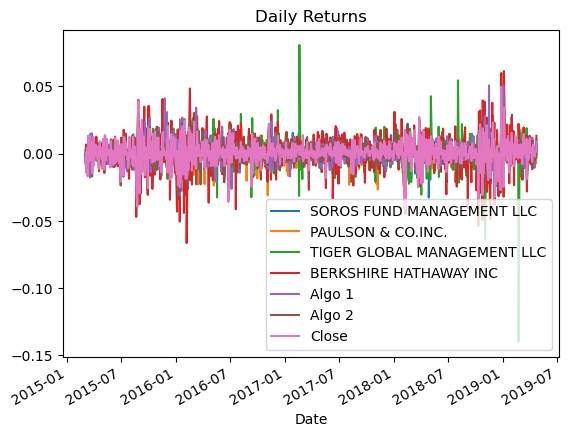

In [198]:
# Calculate and plot daily returns of all portfolios

all_returns.plot(title='Daily Returns')

In [44]:
# Calculate and plot cumulative returns for all portfolios


# Does any portfolio outperform the S&P 500?

In [45]:
# Create a box plot for each of the returns

In [46]:
# Calculate the standard deviation for each portfolio

In [47]:
# Determine which portfolios are riskier than the S&P 500

In [48]:
# Calculate the annualized standard deviation

In [49]:
# Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window

In [50]:
# Calculate and plot the correlation between each stock to determine which portfolios mimic the S&P 500

In [51]:
# Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P 500

In [52]:
# Using the daily returns, calculate the Sharpe ratios and visualize them in a bar plo

In [ ]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios